In [1]:
import pandas as pd
df=pd.read_csv("Downloads/kidney_disease.csv")

df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [2]:
df['classification']=df['classification'].map({'ckd':1,"notckd":0})
df['rbc']=df['rbc'].map({'normal':1, 'abnormal':0})
df['pc']=df['pc'].map({'normal':1, 'abnormal':0})
df['pcc']=df['pcc'].map({'present':1, 'notpresent':0})
df['ba']=df['ba'].map({'present':1, 'notpresent':0})
df['htn']=df['htn'].map({'yes':1,'no':0})
df['dm']=df['dm'].map({'yes':1,'no':0})
df['cad']=df['cad'].map({'yes':1,'no':0})
df['pe']=df['pe'].map({'yes':1,'no':0})
df['ane']=df['ane'].map({'yes':1,'no':0})
df['appet']=df['appet'].map({'good':1,'poor':0})

df=df.dropna()
df['classification']=df['classification'].astype(int)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x=df.drop('classification',axis=1)
y=df['classification']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=knn.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9791666666666666
[[35  0]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.92      0.96        13

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



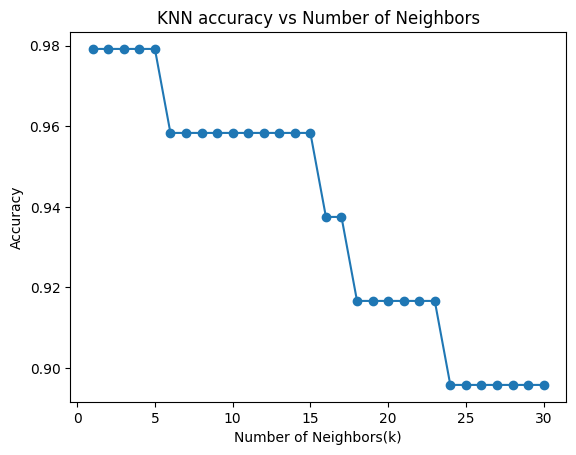

In [10]:
K_values=range(1,31)
accuracy_scores=[]
for i in K_values:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_scores.append(accuracy)

plt.plot(K_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Accuracy')
plt.title('KNN accuracy vs Number of Neighbors')
plt.show()

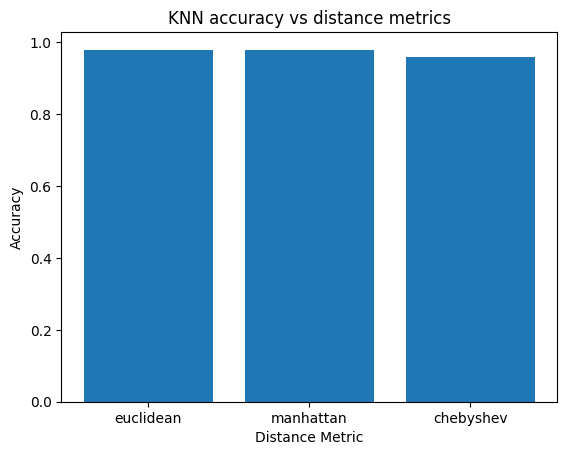

In [15]:
from sklearn.metrics import accuracy_score
metrics=['euclidean','manhattan', 'chebyshev']
accuracy_scores=[]
for i in range(len(metrics)):
    knn=KNeighborsClassifier(n_neighbors=5,metric=metrics[i])
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_scores.append(accuracy)

plt.bar(metrics, accuracy_scores)
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('KNN accuracy vs distance metrics')
plt.show()